In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('data/insurance.csv')

In [143]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [144]:
df.shape

(1338, 7)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [146]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [147]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [148]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [149]:
df[df.charges == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [150]:
df.drop_duplicates(keep = 'first', inplace = True)

In [151]:
df.duplicated().sum()

0

#### All duplicates are removed

In [152]:
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
1104,37,male,29.800,0,no,southwest,20420.60465
559,19,male,35.530,0,no,northwest,1646.42970
1071,63,male,31.445,0,no,northeast,13974.45555
863,36,female,19.855,0,no,northeast,5458.04645


# - EDA

In [153]:
num_cols = df.columns[df.dtypes != 'O']
cat_cols = df.columns[df.dtypes == "O"]

In [154]:
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [155]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

### - Handling numerical columns 

In [156]:
df[num_cols].sample(4)

,age,bmi,children,charges
350,57,23.180,0,11830.60720
262,52,24.320,3,24869.83680
806,40,41.420,1,28476.73499
325,40,34.105,1,6600.20595


In [157]:
df[num_cols].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [158]:
# handling outliers

Text(0.5, 0, 'charges')

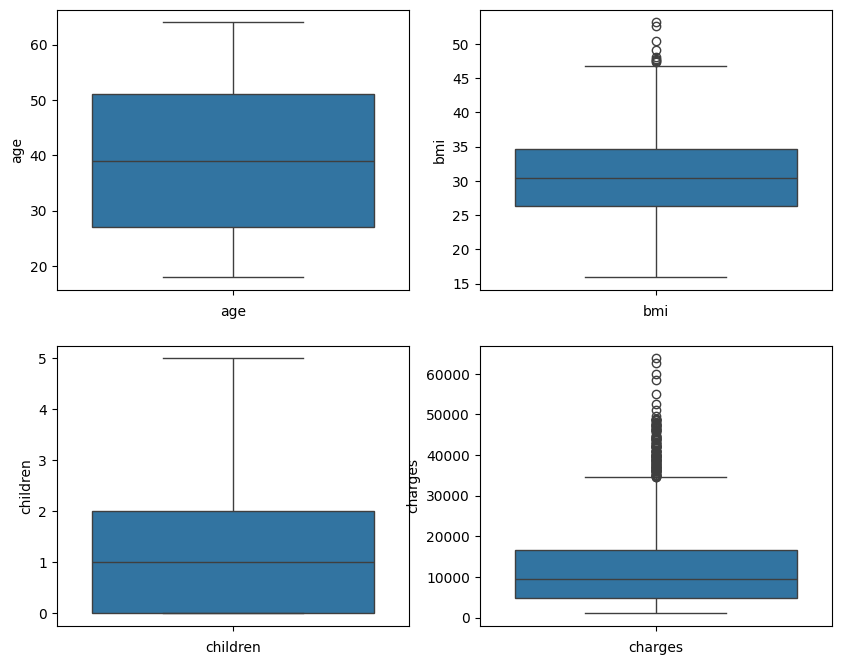

In [159]:
plt.figure(figsize= (10,8) )

plt.subplot(2,2,1)
sns.boxplot(df['age'])
plt.xlabel('age')

plt.subplot(2,2,2)
sns.boxplot(df['bmi'])
plt.xlabel('bmi')

plt.subplot(2,2,3)
sns.boxplot(df['children'])
plt.xlabel('children')

plt.subplot(2,2,4)
sns.boxplot(df['charges'])
plt.xlabel('charges')

Text(0.5, 0, 'charges')

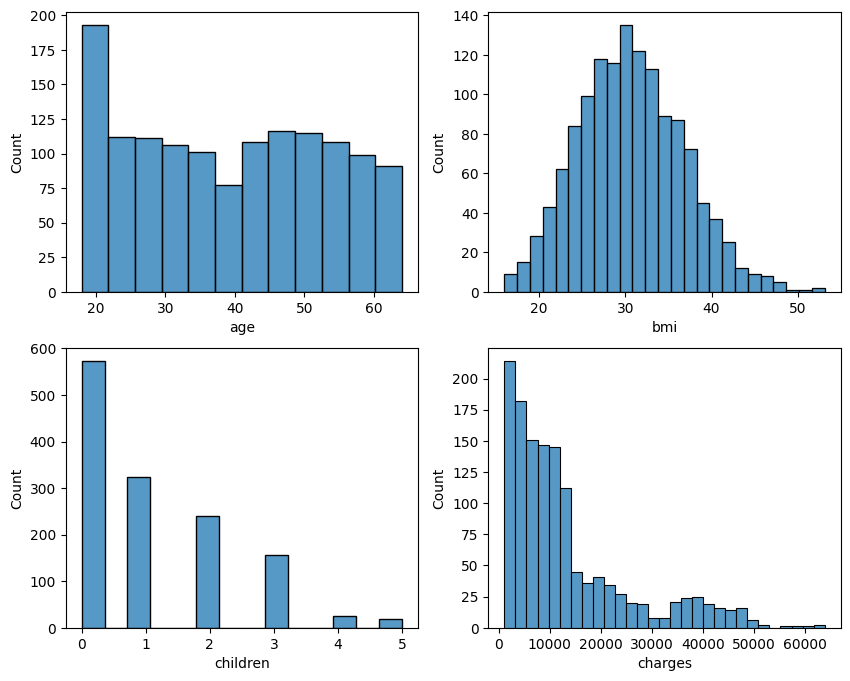

In [160]:
plt.figure(figsize= (10,8) )

plt.subplot(2,2,1)
sns.histplot(df['age'])
plt.xlabel('age')

plt.subplot(2,2,2)
sns.histplot(df['bmi'])
plt.xlabel('bmi')

plt.subplot(2,2,3)
sns.histplot(df['children'])
plt.xlabel('children')

plt.subplot(2,2,4)
sns.histplot(df['charges'])
plt.xlabel('charges')

### - All columns seems okay except charges and bmi, so let's inspect them.

In [161]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

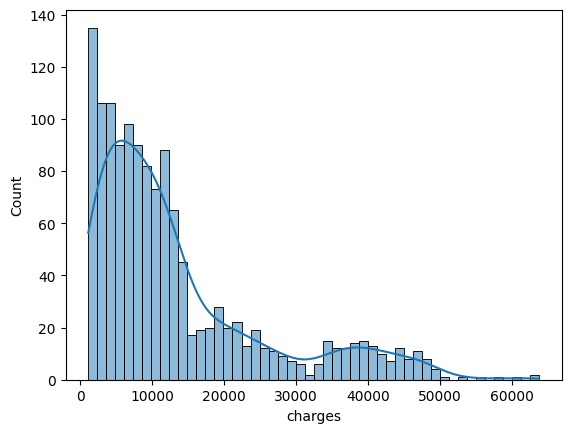

In [162]:
sns.histplot(df['charges'], kde= True, bins= 50)

In [163]:
upper_limit = df['charges'].mean() + 3 * df['charges'].std()

In [164]:
upper_limit

49610.20045568847

In [165]:
df[df['charges'] >= upper_limit ]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


### These outlier seems reasonable. So we won't remove or cap them.

In [166]:
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [167]:
u_limit = df['bmi'].mean() + 3 * df['bmi'].std()

In [168]:
u_limit

48.96485698651382

In [169]:
df[df['bmi'] >= u_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


### - These outliers also seems reasonable, so we won't remove or cap them.

In [170]:
for i in df[num_cols]:
    print(df[i].isnull().sum())

0
0
0
0


### - No outliers in numerical cols

In [171]:
df[num_cols].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


### - The correlation coefficients seems good and there is no multicolinearity among the input variables. 

### - Now comes categorical variables.

In [172]:
df[cat_cols].sample(3)

,sex,smoker,region
961,female,no,southwest
884,male,no,northwest
646,male,no,northwest


In [173]:
df[cat_cols].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


<Axes: xlabel='region', ylabel='count'>

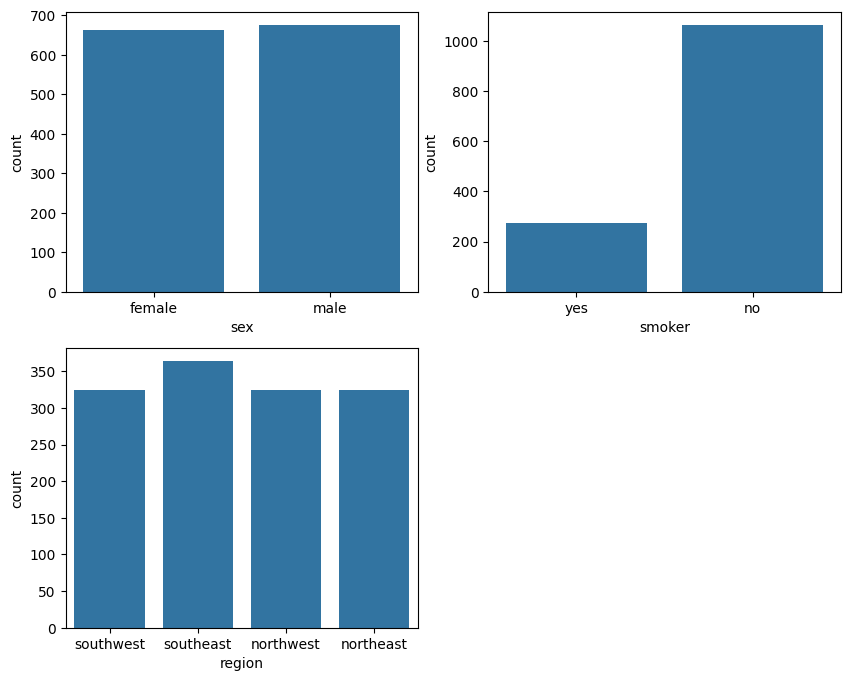

In [174]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.countplot(x= df['sex'])

plt.subplot(2,2,2)
sns.countplot(x= df['smoker'])

plt.subplot(2,2,3)
sns.countplot(x = df['region'])

### - Everything seems good except smoker column. We will use ensembles algos which can handle imbalance data by assigning more weights to minority class.

In [175]:
for i in df[cat_cols]:
    print(i, df[i].isnull().sum())

sex 0
smoker 0
region 0


In [176]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### - No missing values

### - Now dealing with categorical encoding

In [177]:
df[cat_cols].sample(2)

,sex,smoker,region
1145,male,no,northwest
69,male,yes,southeast


#### - Encoding of categorical variables

In [178]:
df.replace({'region':{'southwest':0, "southeast":1, "northwest":2, "northeast":3}}, inplace=True)

In [179]:
df.replace({'sex': {'male':1, "female":0}, 'smoker': {'yes':1, 'no':0}},inplace = True)

In [180]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523


### - Encoding of categorical column is completed.

In [181]:
df['sex'].unique()

array([0, 1], dtype=int64)

In [182]:
df.shape

(1337, 7)

In [183]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [184]:
new_df = df.copy()

# Model building 

In [185]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523


In [186]:
X = df.drop(['charges'], axis = 1)

In [187]:
X.head(2)

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,0
1,18,1,33.77,1,0,1


In [188]:
numerical_cols = X.columns

In [189]:
numerical_cols

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [190]:
y = df['charges']
y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [192]:
scaler_pipeline = Pipeline([('scaler', StandardScaler())])

In [ ]:
preprocessor = ColumnTransformer(transformers=[('scaler_pipeline', scaler_pipeline, numerical_cols)])

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
# scaler = StandardScaler()

In [ ]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [195]:
X_train= pd.DataFrame(data = scaler_pipeline.fit_transform(X_train),columns=scaler_pipeline.get_feature_names_out())
X_test= pd.DataFrame(data = scaler_pipeline.transform(X_test),columns=scaler_pipeline.get_feature_names_out())

In [ ]:
# X_train_scaled = pd.DataFrame(X_train, columns = scaler.get_feature_names_out())
# X_test_scaled = pd.DataFrame(X_test, columns= scaler.get_feature_names_out())

In [196]:
X_train.head(2)

,age,sex,bmi,children,smoker,region
0,-1.157680,0.971409,-0.996928,-0.907908,-0.500292,1.383946
1,-1.300619,0.971409,-0.792762,0.766904,-0.500292,1.383946


In [197]:
X_test.head(2)

,age,sex,bmi,children,smoker,region
0,0.700518,0.971409,-1.326734,-0.907908,-0.500292,1.383946
1,-0.728865,-1.029432,-0.816733,2.441716,-0.500292,-1.333944


In [198]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [199]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [200]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [201]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostRegressor()' : GradientBoostingRegressor(),
    "AdaBoost" : AdaBoostRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    "SupportVectorRegressor" : SVR(),
    "KNN" : KNeighborsRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 5957.608799816462
MAE: 4182.3531552883005
R2 score 80.68466322629111


Lasso
Model Training Performance
RMSE: 5958.155697177743
MAE: 4182.465000194654
R2 score 80.68111683983847


Ridge
Model Training Performance
RMSE: 5960.439825915048
MAE: 4184.752307828588
R2 score 80.6663017605731


Elasticnet
Model Training Performance
RMSE: 7770.65894630306
MAE: 5512.49723693336
R2 score 67.13951140885652


RandomForestRegressor
Model Training Performance
RMSE: 4676.046901557689
MAE: 2565.7971103582095
R2 score 88.10084731643099


GradientBoostRegressor()
Model Training Performance
RMSE: 4293.216609937403
MAE: 2540.8235878822447
R2 score 89.96946905887148


AdaBoost
Model Training Performance
RMSE: 5038.362895064081
MAE: 4131.352285519397
R2 score 86.18543513389533


DecisionTreeRegressor
Model Training Performance
RMSE: 6496.475857066619
MAE: 2982.2716679440296
R2 score 77.0324866383675


SupportVectorRegressor
Model Training Performance
RMSE: 14

In [202]:
max(r2_list)

0.8996946905887149

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(shuffle = True, n_splits = 4, random_state=42)
cv_score = cross_val_score(gbr, X, y, cv = cv, scoring = 'r2', n_jobs = -1)

cv_score.mean()

### Best model is Gradientboost ensemble model, with an score of 90%.

In [ ]:
# import pickle 

In [ ]:
# pickle.dump(scaler, open('scaler.pkl', 'wb'))
# pickle.dump(gbr, open('model.pkl', 'wb'))